In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter settings
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("components/get_data/data/sample1.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15877.000000,20000.000000,20000.000000
mean,1.892380e+07,6.746034e+07,40.728455,-73.952125,153.269050,6.992100,23.274100,1.377446,6.955450,112.901200
std,1.101223e+07,7.857936e+07,0.054755,0.046559,243.325609,21.645449,44.927793,1.683006,32.433831,131.762226
min,2.539000e+03,2.571000e+03,40.508730,-74.239140,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.393540e+06,7.853718e+06,40.689420,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.952117e+07,3.111431e+07,40.722730,-73.955640,105.000000,2.000000,5.000000,0.720000,1.000000,44.000000
75%,2.912936e+07,1.068426e+08,40.762990,-73.936380,175.000000,5.000000,23.000000,2.010000,2.000000,229.000000
max,3.648561e+07,2.742733e+08,40.913060,-73.717950,10000.000000,1250.000000,607.000000,27.950000,327.000000,365.000000


In [5]:
df.isnull().sum()

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64

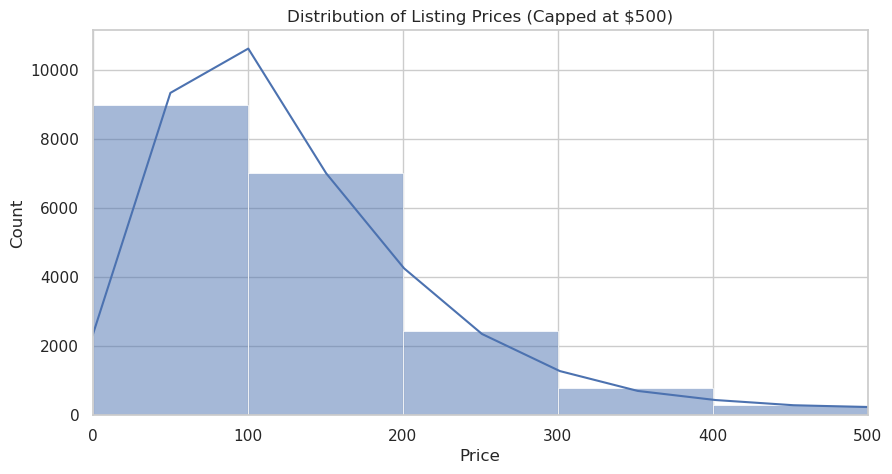

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 500)  # limit x-axis to reduce skew
plt.title("Distribution of Listing Prices (Capped at $500)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

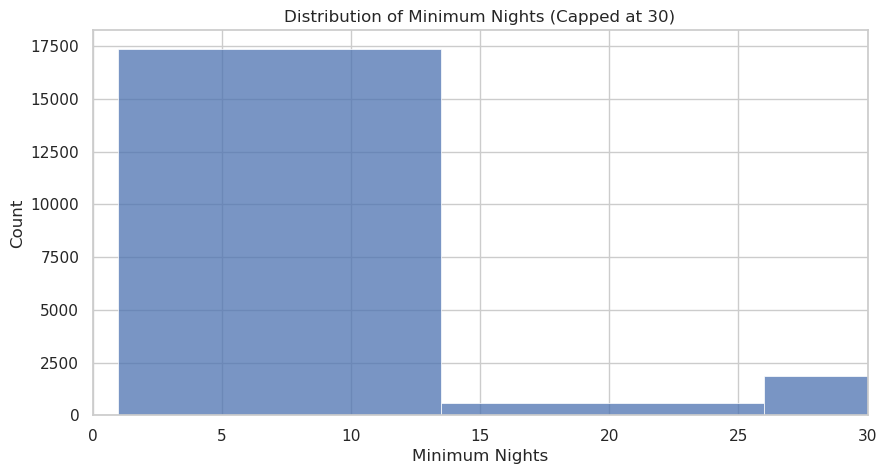

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['minimum_nights'], bins=100)
plt.xlim(0, 30)
plt.title("Distribution of Minimum Nights (Capped at 30)")
plt.xlabel("Minimum Nights")
plt.ylabel("Count")
plt.show()

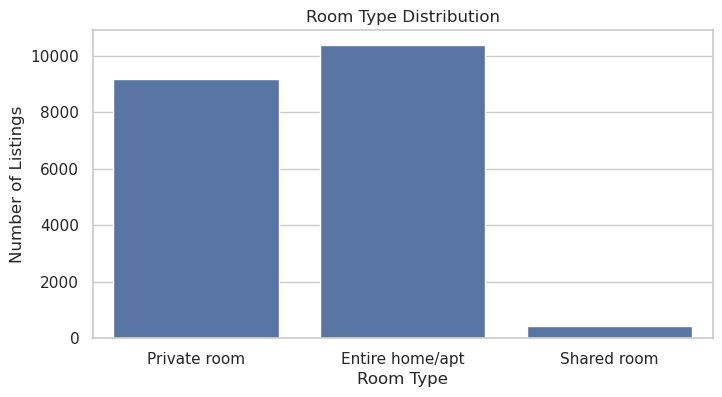

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='room_type')
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

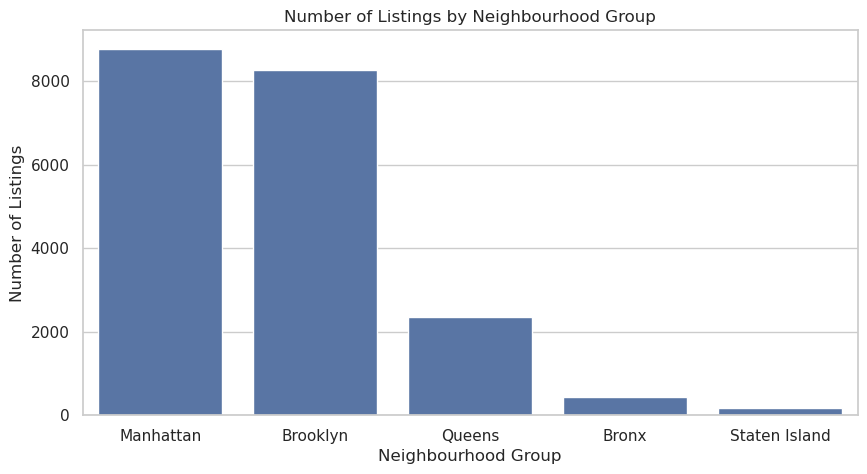

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.dropna(subset=['name', 'host_name'])

In [12]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [13]:
df = df.drop(columns=['last_review'])

In [14]:
df = df[df['price'] <= 500]

In [15]:
df = df[df['minimum_nights'] <= 30]

In [16]:
df.to_csv("components/get_data/data/sample1_cleaned.csv", index=False)

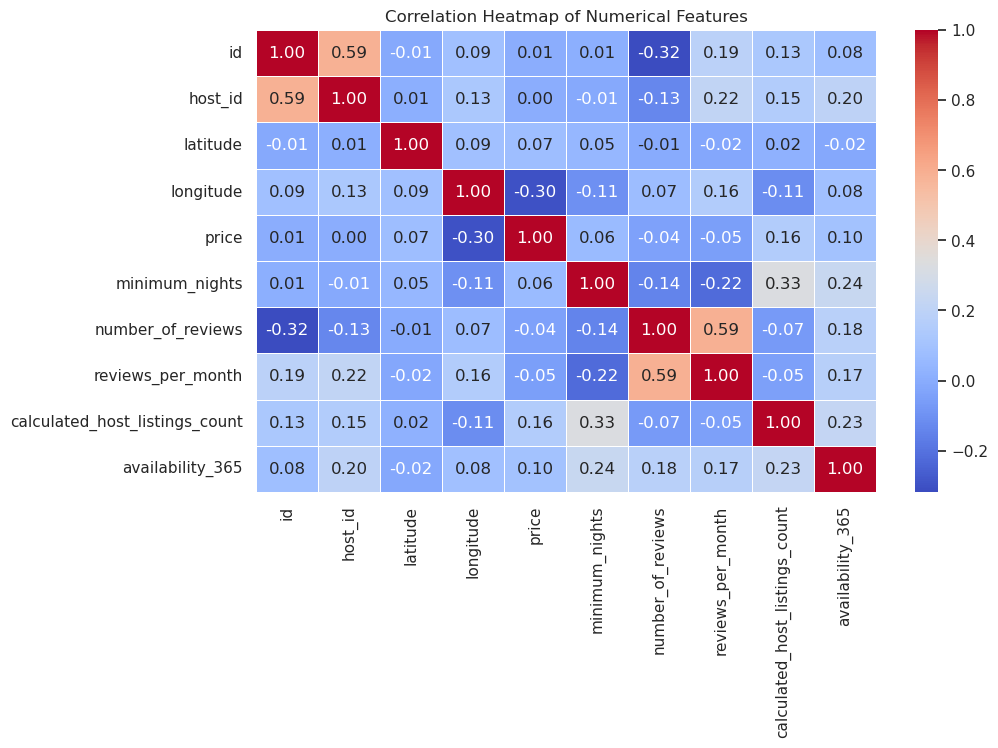

In [17]:
# Create correlation matrix for numerical columns
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

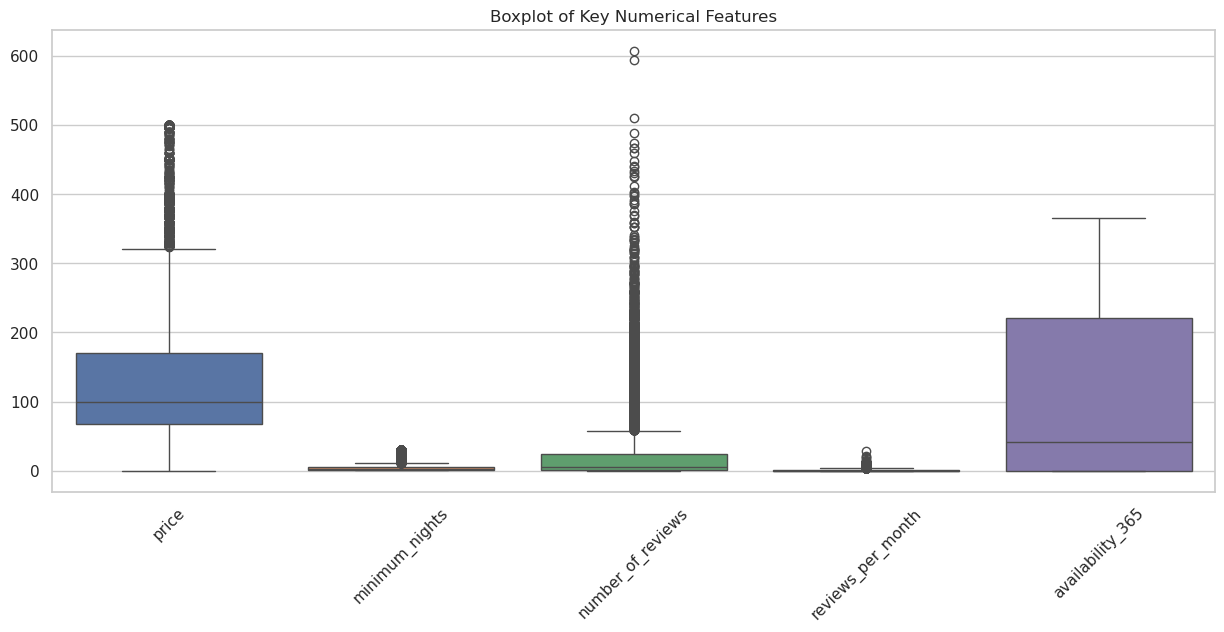

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']])
plt.title("Boxplot of Key Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Filters to remove outliers
df = df[df['number_of_reviews'] <= 200]         # reasonable upper limit
df = df[df['reviews_per_month'] <= 10]          # get morel listings than 10 a month
df = df[df['availability_365'] <= 365]          # can't be > 365 days

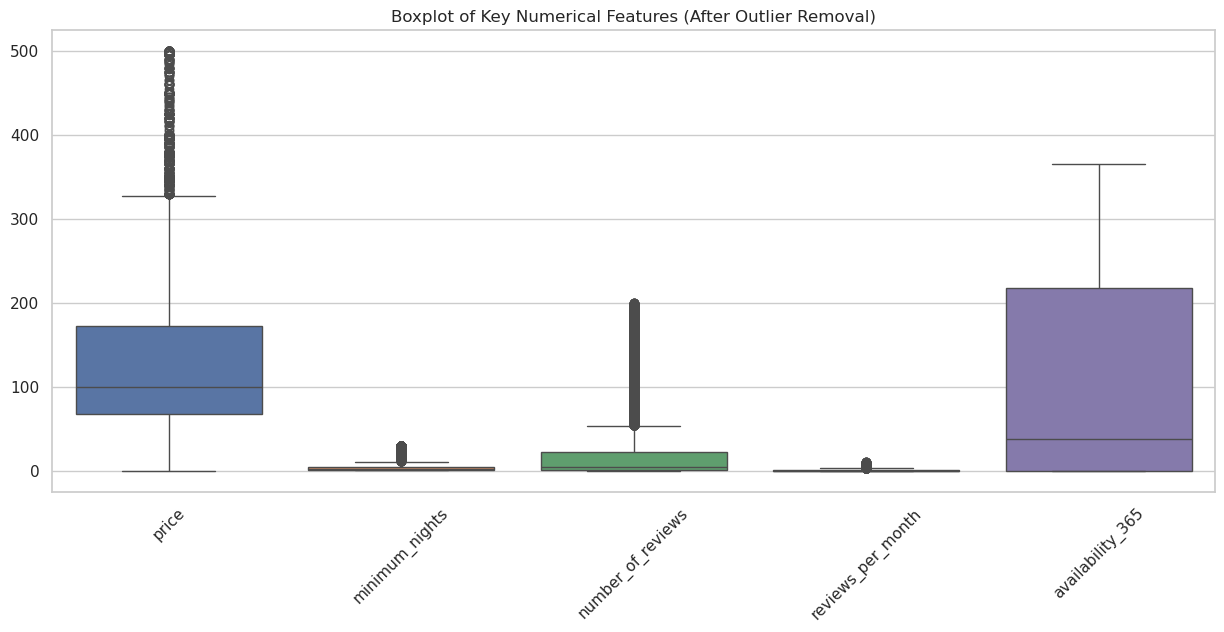

In [20]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']])
plt.title("Boxplot of Key Numerical Features (After Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

In [21]:
df.to_csv("components/get_data/data/sample1_cleaned.csv", index=False)

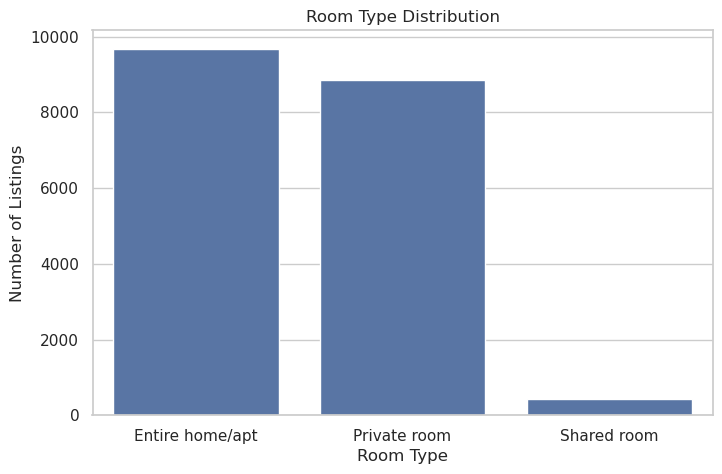

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=0)
plt.show()

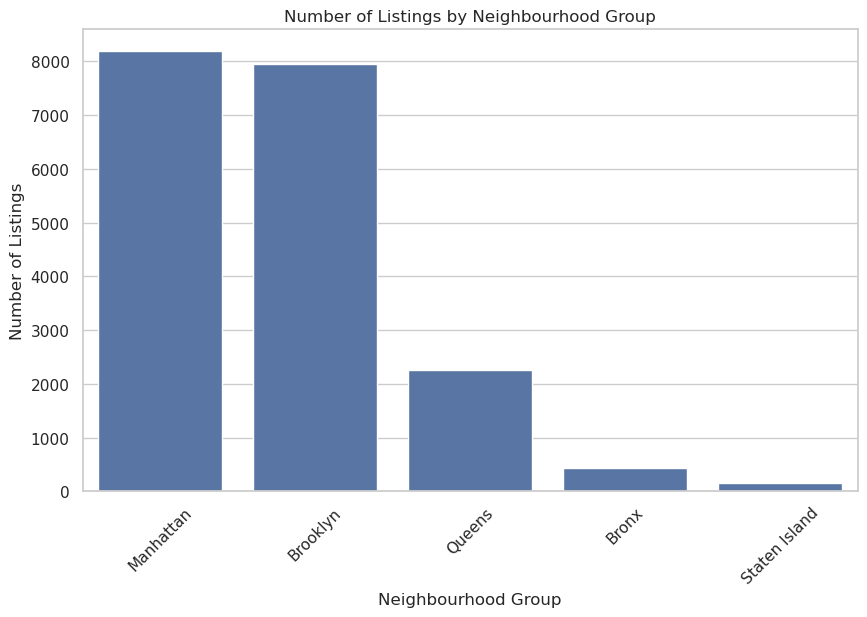

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_42353/3258955407.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.mean, ci=None,


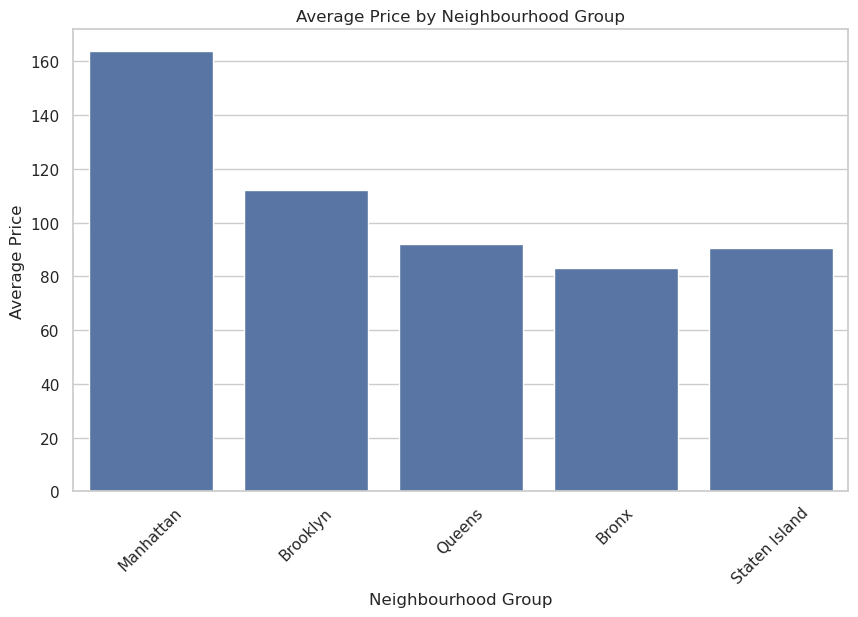

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.mean, ci=None,
            order=df['neighbourhood_group'].value_counts().index)
plt.title("Average Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

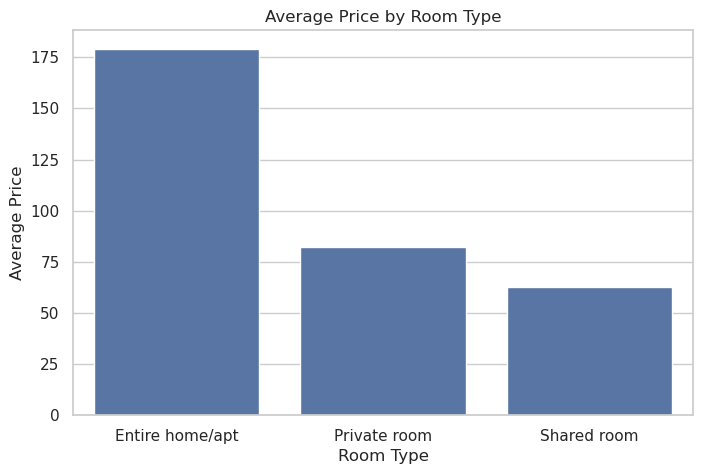

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='room_type', y='price', estimator=np.mean, errorbar=None,
            order=df['room_type'].value_counts().index)
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.show()

In [26]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [27]:
df_model = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude'])

In [28]:
df_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [29]:
# Feature 1: reviews_per_year
# Fill NaNs with 0 to represent listings with no reviews
df['reviews_per_year'] = df['reviews_per_month'].fillna(0) * 12

# Feature 2: is_available
# 1 if available at least 1 day/year, else 0
df['is_available'] = (df['availability_365'] > 0).astype(int)

# Take a peak at the first few rows
df[['reviews_per_month', 'reviews_per_year', 'availability_365', 'is_available']].head()

,reviews_per_month,reviews_per_year,availability_365,is_available
0,0.13,1.56,5,1
1,0.00,0.00,188,1
2,1.12,13.44,0,0
3,0.65,7.80,13,1
4,0.52,6.24,8,1


In [30]:
df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'reviews_per_month'], axis=1, inplace=True)

# Take a peak at shape and head
df.shape, df.head()

((18985, 10),
   neighbourhood_group   neighbourhood        room_type  price  minimum_nights  \
 0              Queens       Sunnyside     Private room     74               2   
 1           Manhattan  Hell's Kitchen  Entire home/apt    170               3   
 2           Manhattan    West Village  Entire home/apt    245               3   
 3              Queens         Astoria  Entire home/apt    125               3   
 4            Brooklyn        Bushwick     Private room     65               2   
 
    number_of_reviews  calculated_host_listings_count  availability_365  \
 0                  6                               1                 5   
 1                  0                               1               188   
 2                 51                               1                 0   
 3                  1                               1                13   
 4                  8                               2                 8   
 
    reviews_per_year  is_available  
 0 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18985 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             18985 non-null  object 
 1   neighbourhood                   18985 non-null  object 
 2   room_type                       18985 non-null  object 
 3   price                           18985 non-null  int64  
 4   minimum_nights                  18985 non-null  int64  
 5   number_of_reviews               18985 non-null  int64  
 6   calculated_host_listings_count  18985 non-null  int64  
 7   availability_365                18985 non-null  int64  
 8   reviews_per_year                18985 non-null  float64
 9   is_available                    18985 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.6+ MB


In [32]:
# Convert object columns to category
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')

# Confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18985 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             18985 non-null  category
 1   neighbourhood                   18985 non-null  category
 2   room_type                       18985 non-null  category
 3   price                           18985 non-null  int64   
 4   minimum_nights                  18985 non-null  int64   
 5   number_of_reviews               18985 non-null  int64   
 6   calculated_host_listings_count  18985 non-null  int64   
 7   availability_365                18985 non-null  int64   
 8   reviews_per_year                18985 non-null  float64 
 9   is_available                    18985 non-null  int64   
dtypes: category(3), float64(1), int64(6)
memory usage: 1.2 MB


In [33]:
# Step 5.1: Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

In [34]:
from sklearn.model_selection import train_test_split

# Step 5.2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Get list of categorical features
categorical_features = X.select_dtypes(include=["category"]).columns.tolist()

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

In [36]:
X_processed = preprocessor.fit_transform(X)
X_processed[:5]

array([[  0.  ,   0.  ,   0.  , ...,   5.  ,   1.56,   1.  ],
       [  0.  ,   0.  ,   1.  , ..., 188.  ,   0.  ,   1.  ],
       [  0.  ,   0.  ,   1.  , ...,   0.  ,  13.44,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,  13.  ,   7.8 ,   1.  ],
       [  0.  ,   1.  ,   0.  , ...,   8.  ,   6.24,   1.  ]])

In [37]:
print("Processed feature shape:", X_processed.shape)

Processed feature shape: (18985, 229)


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

In [40]:
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (15188, 229)
Test shape: (3797, 229)


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Create model with default settings
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manually take square root
r2 = r2_score(y_test, y_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R²:", r2)

Random Forest RMSE: 63.88090687699704
Random Forest R²: 0.4551763971117009


In [43]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0]
}

In [44]:
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

In [45]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict with best model
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate manually
mse = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse)
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Random Forest RMSE:", rmse_best)
print("Tuned Random Forest R²:", r2_best)

Tuned Random Forest RMSE: 61.59996883911057
Tuned Random Forest R²: 0.4933888394760204


    ## Final ML Pipeline – Text-Based Diagram
    
    ```
     START
      │
      ├──► Load the dataset (csv file) using pandas
      │
      ├──► Initial EDA (Exploratory Data Analysis)
      │       ├─ Inspect column names and types
      │       ├─ Check for nulls and duplicates
      │       └─ Visualize distributions (e.g., price by room type)
      │
      ├──► Feature Engineering & Data Cleaning
      │       ├─ Create 'reviews_per_year' from 'reviews_per_month'
      │       ├─ Create 'is_available' binary feature
      │       └─ Drop irrelevant columns (IDs, names, geo-coords)
      │
      ├──► Encode Categorical Features
      │       └─ Use OneHotEncoder for room_type, neighborhood, etc.
      │
      ├──► Assemble Feature Matrix and Target Variable
      │       ├─ `X_processed` ← all features
      │       └─ `y` ← price
      │
      ├──► Split Data
      │       ├─ 80% → Training (`X_train`, `y_train`)
      │       └─ 20% → Testing (`X_test`, `y_test`)
      │
      ├──► Train Initial Model (RandomForestRegressor)
      │       └─ Evaluate with RMSE and R²
      │
      ├──► Hyperparameter Tuning (RandomizedSearchCV)
      │       └─ Find best n_estimators, max_depth, etc.
      │
      ├──► Train Tuned Model and Re-Evaluate
      │       ├─ `best_rf.predict(X_test)`
      │       └─ Compute new RMSE and R²
      │
      ├──► Visualize the Pipeline (Flowchart or Code Commentary)
      │
     END
    
    ```

In [47]:
import joblib

# Save the tuned model to disk
joblib.dump(best_rf, "random_forest_best_model.joblib")

['random_forest_best_model.joblib']

In [48]:
# Load the saved model
loaded_model = joblib.load("random_forest_best_model.joblib")

# Predict again using the reloaded model
y_loaded_pred = loaded_model.predict(X_test)

# Confirm it matches the original predictions
print("Match with best_rf:", (y_loaded_pred == y_pred_best).all())

Match with best_rf: True


### Model Reproduction Instructions

To reproduce the final tuned Random Forest model and predictions:

```python
import joblib

# Load the saved model from disk
loaded_model = joblib.load("random_forest_best_model.joblib")

# Predict again using the reloaded model
y_loaded_pred = loaded_model.predict(X_test)

# Confirm predictions match the original best model
print("Match with best_rf:", (y_loaded_pred == y_pred_best).all())

#### Note on Reproducing Predictions

The `X_test` variable must be re-created from the **same data processing pipeline** used during training.

This includes:
- All cleaning steps (e.g., handling nulls, removing unused columns)
- Feature engineering (e.g., `reviews_per_year`, `is_available`)
- One-hot encoding of categorical features

If the pipeline is not followed exactly, the shape or feature set of `X_test` will mismatch what the model expects, causing prediction errors.